## Taking a look around in R and RStudio

Notice the various windows. 

1. The Console allows you to enter commands and view results
2. The Environment window will show you the various objects R is keeping track of (vectors, datasets, lists, etc.)
3. The bottom right window will show you files, figures/graphs, help files, and more. 
4. If you create/open a script, it will appear in the top-right by default. I encourage using an R project and R script for nearly all work. 

## Start an RStudio project

Steps:

- File &rarr; New Project
- Choose a name for the project and folder location.^[I have a folder called "labs" located in the my main PUBG 511 folder. If you are primarily going to be using RStudio through the computer lab or the Virtual App, then place this folder in your H:\ network space]
- Now start a new script using the sheet with a plus sign icon from the toolbar or using the file menu. On the right side of your window, it should show the name of your project.
- RStudio projects make it so you don't need to worry about setting a working directory - it is defined in the project. Just make sure all files written to or read by R are in the same folder or in a nested subfolder. 

## Installing and loading packages

R is open-source, and, frankly, kinda stinks on its own.^[This is called base R.] But there are many, many user-generated packages that improve R's functionality. We'll be using these packages all the time, especially a group of packages called [the tidyverse](https://www.tidyverse.org/packages/). 

You only need to install the package once and then you're good to go (until it needs updating). But you also need to load the package in every R session if you want to use those commands. 

In [1]:
# Install the required packages if not already installed 
# By the way, the hashtag/pound/octothorpe symbol will comment out a line in your script

 install.packages(c('tidyverse', 'haven', 'dataverse'))

# let's load your packages in the R session

library(tidyverse)
library(haven)
library(dataverse)

Installing packages into 'C:/Users/bowen/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked
package 'haven' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'haven'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bowen\AppData\Local\R\win-library\4.2\00LOCK\haven\libs\x64\haven.dll to C:\Users\bowen\AppData\Local\R\win-library\4.2\haven\libs\x64\haven.dll: Permission denied"
Warning message:
"restored 'haven'"


package 'dataverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bowen\AppData\Local\Temp\RtmpYXurAT\downloaded_packages


Warning message:
"package 'tidyverse' was built under R version 4.2.2"
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
"package 'dataverse' was built under R version 4.2.2"


## Some basic built-in functions

R can handle a great diversity of *objects* including lists, variables, names, vectors, data frames, scalars, and plots. Let's create a vector of data using a random draw from a normal distribution and then use two functions to describe the variable.

In [2]:
x <- rnorm(2500, mean = 50, sd = 10)
mean(x)
summary(x)

[1] 50.29298

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.37   43.51   50.14   50.29   57.10   83.92 

We can check the distribution of our variable using a histogram.

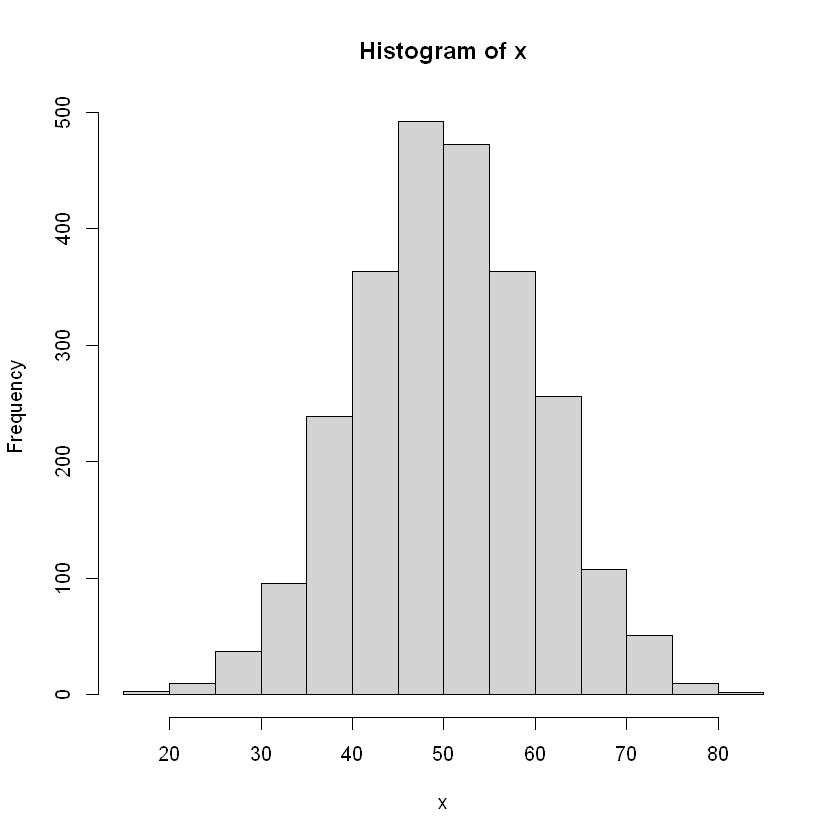

In [3]:
hist(x)

We could change the number of bins used by the histogram if we want and change the y-axis from a frequency to a probability (much better). R options will typically require a value (like the 30 in the breaks option below) or a logical entry of TRUE or FALSE to toggle settings on or off.

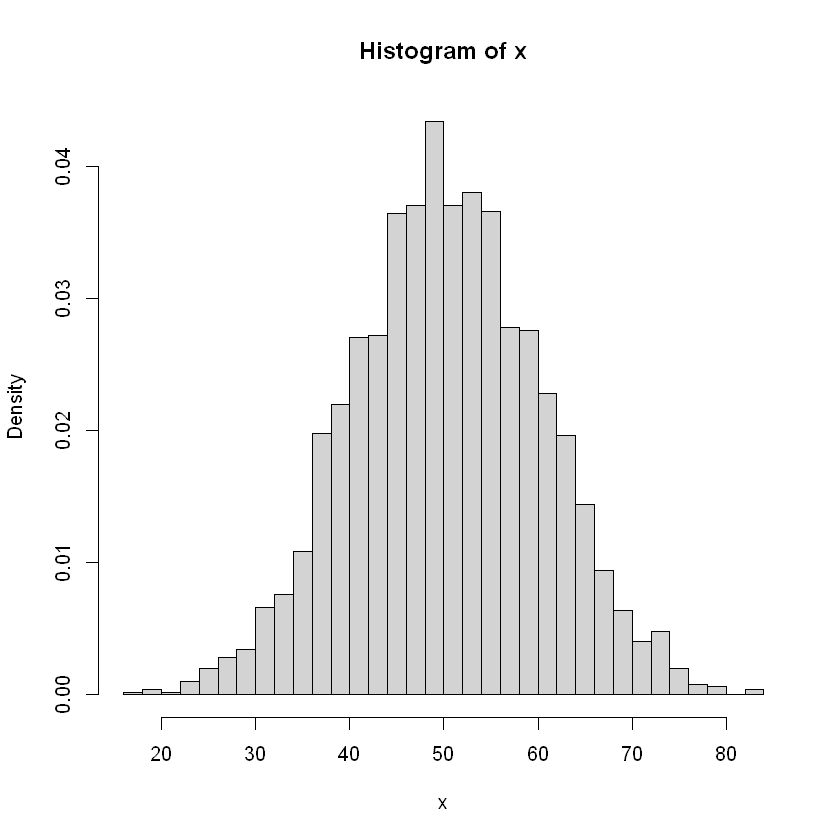

In [4]:
hist(x, breaks = 30, probability = TRUE)

Let's run hist() once more, this time suppressing the data and asking R to give use the output in the console.

In [5]:
hist(x, breaks = 30, probability = TRUE, plot = FALSE)

Warning message in hist.default(x, breaks = 30, probability = TRUE, plot = FALSE):
"argument 'probability' is not made use of"


$breaks
 [1] 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 64
[26] 66 68 70 72 74 76 78 80 82 84

$counts
 [1]   1   2   1   5  10  14  17  33  38  54  99 110 135 136 182 185 217 185 190
[20] 183 139 138 114  98  72  47  32  20  24  10   4   3   0   2

$density
 [1] 0.0002 0.0004 0.0002 0.0010 0.0020 0.0028 0.0034 0.0066 0.0076 0.0108
[11] 0.0198 0.0220 0.0270 0.0272 0.0364 0.0370 0.0434 0.0370 0.0380 0.0366
[21] 0.0278 0.0276 0.0228 0.0196 0.0144 0.0094 0.0064 0.0040 0.0048 0.0020
[31] 0.0008 0.0006 0.0000 0.0004

$mids
 [1] 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53 55 57 59 61 63 65
[26] 67 69 71 73 75 77 79 81 83

$xname
[1] "x"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

## Opening datasets

R has various formats for datasets, typically called a data frame. We could download the ABH_full_district file from [The Journal of Politcs' Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VR12G4) using your web browser. Dataverse repositories allow files to be downloaded in multiple formats: usually as a Stata file, an R workspace, or as a .csv or .tab delimited text file. If you were to place your files in the same folder that you have set as your project location, you would not need to specify working directories or complete file paths; your computer will already know were to look for the data.

We can load an Rdata workspace using the *load()* function. To open the Stata .dta file, we'll need to use functionality from the *read_dta()* function from the **haven** package. But instead, let's use the functionality of the **dataverse** package to directly ingest the data from the online repository in to R. 

In [6]:
ABH.data <- get_dataframe_by_doi(                    # we'll name the dataframe ABH.data
          filedoi = "doi:10.7910/DVN/VR12G4/WGIHIT", # this is the code for the specific table we want
          original = TRUE,                           # original is Stata 13 binary in this dataset
          .f = haven::read_dta,                      # to read .dta files, calling up haven's read_dta function
          server = "dataverse.harvard.edu")          

## Using the pipe (|>)

The pipe operator allows users to pass objects onto multiple functions without creating new variables or nesting functions. The original pipe is built in to the **tidyverse** packages (%>%), and you'll see many example codes online using this pipe. It's great. However, starting in R version 4.1, base R includes a new pipe operator that will work throughout everything in R (|>). Let's look at the example below using **tidyverse**'s *summarize* function, which aggregates data in the ways specfied in the command. In this case, we're summarizing two variables (two separate measures of member ideology, coded so that more extreme ideology is higher) in the ABH.data dataset by asking R to calculate their means. 


In [7]:
ABH.data |> summarize(mean_nom = mean(abs_dist_nom, na.rm = TRUE), 
                      mean_cvp = mean(abs_dist_cvp, na.rm = TRUE))

mean_nom,mean_cvp
<dbl>,<dbl>
0.3673664,0.2189927


So here, the pipe passes the data (ABH.data) to the summarize function. We could have specified the data directly inside the summarize function if we wanted to. But using the pipe will let us have a great deal more control over the how we process the data. 

## **filter** and **group_by**

These functions are also part of the **tidyverse**. *filter()* allows us to, well, filter our observations based on some condition or a list of conditions. In the code below, we select just those districts that come after the 105th Congress. 

The *group_by()* function allows you to aggregate your data by grouping variables. In the code below, we group the data by congress and whether the member is in their first term or not (coded 1 or 0) prior to calculating the means. 

In [9]:
ABH.data |> filter(congress>105) |> 
       group_by(congress, first_term) |> 
                summarize(mean_nom = mean(abs_dist_nom, na.rm = TRUE), 
                          mean_cvp = mean(abs_dist_cvp, na.rm = TRUE))

`summarise()` has grouped output by 'congress'. You can override using the
`.groups` argument.


congress,first_term,mean_nom,mean_cvp
<dbl>,<dbl>,<dbl>,<dbl>
106,0,0.4035167,0.1971955
106,1,0.4188537,0.2066827
107,0,0.4115987,0.2002545
107,1,0.3741744,0.1466879
108,0,0.4129101,0.2309164
108,1,0.3689608,0.1896715
109,0,0.4167296,0.2357825
109,1,0.3606923,0.1949152
110,0,0.4239717,0.2732154


The pipe first passes the data to be filtered, then passes the filtered dataset to be grouped, then passes the grouped and final data to be summarized. If you want to insert the pipe using a keyboard shortcut in RStudio, you can use <kbd>ctrl</kbd> + <kbd>shift</kbd> + <kbd>m</kbd>. Note that the shortcut uses the **tidyverse** pipe by default, but you can change it to the base R |> pipe in the settings. Check the "Use native pipe operator, |> (requires $ 4.1+) box in Tools &rarr; Global Options &rarr; Code menu window.